In [1]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive

In [2]:
# drive.mount('/gdrive')
# energy_data_path='/gdrive/My Drive/solar/energy.csv'
# energy=pd.read_csv(energy_data_path)
# dangjin_fcst_path='/gdrive/My Drive/solar/dangjin_fcst_data.csv'
# dangjin_fcst = pd.read_csv('/gdrive/My Drive/solar/dangjin_fcst_data.csv')

In [3]:
energy_data_path='sample_data/energy.csv'
energy=pd.read_csv(energy_data_path)
dangjin_fcst_path='sample_data/dangjin_fcst_data.csv'
dangjin_fcst = pd.read_csv(dangjin_fcst_path)

In [4]:
energy

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0
25628,2021-01-31 21:00:00,0.0,0.0,0,0
25629,2021-01-31 22:00:00,0.0,0.0,0,0
25630,2021-01-31 23:00:00,0.0,0.0,0,0


In [5]:
dangjin_fcst

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,7.0,40.0,3.2,187.0,1.0
162204,2021-03-01 08:00:00,55.0,8.0,40.0,4.5,217.0,1.0
162205,2021-03-01 08:00:00,58.0,5.0,55.0,2.2,210.0,1.0
162206,2021-03-01 08:00:00,61.0,1.0,80.0,1.9,164.0,1.0


In [6]:
dangjin_fcst = dangjin_fcst.drop_duplicates(subset = ['Forecast time'], ignore_index = True)
dangjin_fcst

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 14:00:00,4.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 17:00:00,4.0,-2.0,60.0,7.5,326.0,1.0
3,2018-03-01 20:00:00,4.0,-2.0,50.0,5.8,336.0,1.0
4,2018-03-01 23:00:00,4.0,-3.0,55.0,5.0,339.0,1.0
...,...,...,...,...,...,...,...
8763,2021-02-28 20:00:00,4.0,6.0,65.0,1.3,45.0,4.0
8764,2021-02-28 23:00:00,4.0,6.0,80.0,2.7,31.0,4.0
8765,2021-03-01 02:00:00,4.0,6.0,90.0,4.0,40.0,4.0
8766,2021-03-01 05:00:00,4.0,7.0,90.0,3.7,56.0,4.0


In [7]:
import datetime as dt

In [8]:
dangjin_fcst["Forecast time"]

0       2018-03-01 11:00:00
1       2018-03-01 14:00:00
2       2018-03-01 17:00:00
3       2018-03-01 20:00:00
4       2018-03-01 23:00:00
               ...         
8763    2021-02-28 20:00:00
8764    2021-02-28 23:00:00
8765    2021-03-01 02:00:00
8766    2021-03-01 05:00:00
8767    2021-03-01 08:00:00
Name: Forecast time, Length: 8768, dtype: object

In [9]:
KST = dt.timezone(dt.timedelta(hours=9))
def str_to_datetime(time):
    return dt.datetime.fromisoformat(time).replace(tzinfo = KST)
dangjin_fcst['Forecast time'] = dangjin_fcst['Forecast time'].apply(str_to_datetime)
dangjin_fcst

/tmp/ipykernel_878611/218828031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dangjin_fcst['Forecast time'] = dangjin_fcst['Forecast time'].apply(str_to_datetime)


,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00+09:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 14:00:00+09:00,4.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 17:00:00+09:00,4.0,-2.0,60.0,7.5,326.0,1.0
3,2018-03-01 20:00:00+09:00,4.0,-2.0,50.0,5.8,336.0,1.0
4,2018-03-01 23:00:00+09:00,4.0,-3.0,55.0,5.0,339.0,1.0
...,...,...,...,...,...,...,...
8763,2021-02-28 20:00:00+09:00,4.0,6.0,65.0,1.3,45.0,4.0
8764,2021-02-28 23:00:00+09:00,4.0,6.0,80.0,2.7,31.0,4.0
8765,2021-03-01 02:00:00+09:00,4.0,6.0,90.0,4.0,40.0,4.0
8766,2021-03-01 05:00:00+09:00,4.0,7.0,90.0,3.7,56.0,4.0


In [10]:
dangjin_fcst["Forecast time"]

0      2018-03-01 11:00:00+09:00
1      2018-03-01 14:00:00+09:00
2      2018-03-01 17:00:00+09:00
3      2018-03-01 20:00:00+09:00
4      2018-03-01 23:00:00+09:00
                  ...           
8763   2021-02-28 20:00:00+09:00
8764   2021-02-28 23:00:00+09:00
8765   2021-03-01 02:00:00+09:00
8766   2021-03-01 05:00:00+09:00
8767   2021-03-01 08:00:00+09:00
Name: Forecast time, Length: 8768, dtype: datetime64[ns, UTC+09:00]

In [11]:
dangjin_fcst["Forecast time"] = dangjin_fcst["Forecast time"].apply(lambda x: x+dt.timedelta(hours = 4))
dangjin_fcst.drop(["forecast"], axis = 1, inplace = True)
dangjin_fcst

/tmp/ipykernel_878611/880576198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dangjin_fcst["Forecast time"] = dangjin_fcst["Forecast time"].apply(lambda x: x+dt.timedelta(hours = 4))
/tmp/ipykernel_878611/880576198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dangjin_fcst.drop(["forecast"], axis = 1, inplace = True)


,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 15:00:00+09:00,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 18:00:00+09:00,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 21:00:00+09:00,-2.0,60.0,7.5,326.0,1.0
3,2018-03-02 00:00:00+09:00,-2.0,50.0,5.8,336.0,1.0
4,2018-03-02 03:00:00+09:00,-3.0,55.0,5.0,339.0,1.0
...,...,...,...,...,...,...
8763,2021-03-01 00:00:00+09:00,6.0,65.0,1.3,45.0,4.0
8764,2021-03-01 03:00:00+09:00,6.0,80.0,2.7,31.0,4.0
8765,2021-03-01 06:00:00+09:00,6.0,90.0,4.0,40.0,4.0
8766,2021-03-01 09:00:00+09:00,7.0,90.0,3.7,56.0,4.0


In [12]:
curr_hour = dt.datetime(2018, 3, 1, 1, tzinfo = KST)
end_hour = dt.datetime(2021, 2, 1, 0, tzinfo = KST)
delta = dt.timedelta(hours = 1)
temp_hours = []
while(True):
    temp_hours.append(curr_hour)
    if curr_hour == end_hour:
        break
    curr_hour += delta

In [13]:
temp_hours = pd.DataFrame(temp_hours, columns = ["Forecast time"])

In [14]:
temp_hours

,Forecast time
0,2018-03-01 01:00:00+09:00
1,2018-03-01 02:00:00+09:00
2,2018-03-01 03:00:00+09:00
3,2018-03-01 04:00:00+09:00
4,2018-03-01 05:00:00+09:00
...,...
25627,2021-01-31 20:00:00+09:00
25628,2021-01-31 21:00:00+09:00
25629,2021-01-31 22:00:00+09:00
25630,2021-01-31 23:00:00+09:00


In [15]:
dangjin_fcst = dangjin_fcst.merge(temp_hours, how = "right", on = "Forecast time")

In [16]:
dangjin_fcst

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 01:00:00+09:00,NaN,NaN,NaN,NaN,NaN
1,2018-03-01 02:00:00+09:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-01 03:00:00+09:00,NaN,NaN,NaN,NaN,NaN
3,2018-03-01 04:00:00+09:00,NaN,NaN,NaN,NaN,NaN
4,2018-03-01 05:00:00+09:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
25627,2021-01-31 20:00:00+09:00,NaN,NaN,NaN,NaN,NaN
25628,2021-01-31 21:00:00+09:00,6.0,80.0,4.0,174.0,4.0
25629,2021-01-31 22:00:00+09:00,NaN,NaN,NaN,NaN,NaN
25630,2021-01-31 23:00:00+09:00,NaN,NaN,NaN,NaN,NaN


In [17]:
dangjin_fcst.interpolate(method = 'ffill')

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 01:00:00+09:00,NaN,NaN,NaN,NaN,NaN
1,2018-03-01 02:00:00+09:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-01 03:00:00+09:00,NaN,NaN,NaN,NaN,NaN
3,2018-03-01 04:00:00+09:00,NaN,NaN,NaN,NaN,NaN
4,2018-03-01 05:00:00+09:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
25627,2021-01-31 20:00:00+09:00,6.0,75.0,3.3,168.0,3.0
25628,2021-01-31 21:00:00+09:00,6.0,80.0,4.0,174.0,4.0
25629,2021-01-31 22:00:00+09:00,6.0,80.0,4.0,174.0,4.0
25630,2021-01-31 23:00:00+09:00,6.0,80.0,4.0,174.0,4.0


In [18]:
dangjin_fcst.interpolate(method = 'bfill')

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 01:00:00+09:00,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 02:00:00+09:00,0.0,60.0,7.3,309.0,2.0
2,2018-03-01 03:00:00+09:00,0.0,60.0,7.3,309.0,2.0
3,2018-03-01 04:00:00+09:00,0.0,60.0,7.3,309.0,2.0
4,2018-03-01 05:00:00+09:00,0.0,60.0,7.3,309.0,2.0
...,...,...,...,...,...,...
25627,2021-01-31 20:00:00+09:00,6.0,80.0,4.0,174.0,4.0
25628,2021-01-31 21:00:00+09:00,6.0,80.0,4.0,174.0,4.0
25629,2021-01-31 22:00:00+09:00,7.0,80.0,6.0,176.0,4.0
25630,2021-01-31 23:00:00+09:00,7.0,80.0,6.0,176.0,4.0


In [19]:
dangjin_fcst.iloc[0] = dangjin_fcst.interpolate(method = 'bfill').iloc[0]
dangjin_fcst.iloc[-1] = dangjin_fcst.interpolate(method = 'ffill').iloc[-1]

In [20]:
dangjin_fcst

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 01:00:00+09:00,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 02:00:00+09:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-01 03:00:00+09:00,NaN,NaN,NaN,NaN,NaN
3,2018-03-01 04:00:00+09:00,NaN,NaN,NaN,NaN,NaN
4,2018-03-01 05:00:00+09:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
25627,2021-01-31 20:00:00+09:00,NaN,NaN,NaN,NaN,NaN
25628,2021-01-31 21:00:00+09:00,6.0,80.0,4.0,174.0,4.0
25629,2021-01-31 22:00:00+09:00,NaN,NaN,NaN,NaN,NaN
25630,2021-01-31 23:00:00+09:00,NaN,NaN,NaN,NaN,NaN


**보간 방법 간 비교**
---


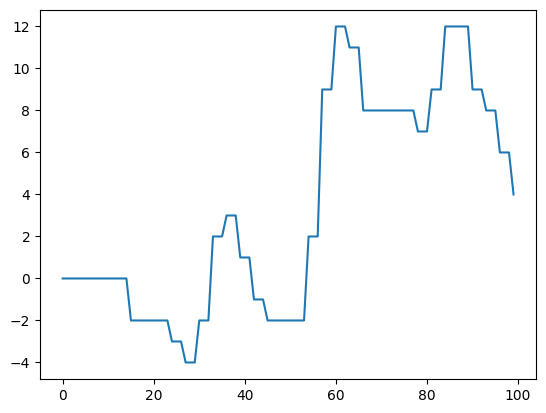

In [21]:
plt.plot(dangjin_fcst['Temperature'].interpolate('bfill')[:100])

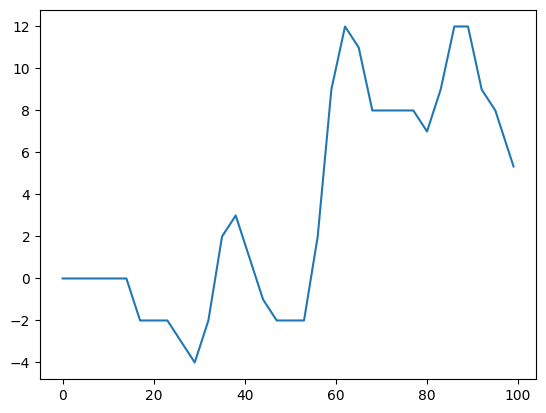

In [22]:
plt.plot(dangjin_fcst['Temperature'].interpolate('slinear')[:100])

In [23]:
dangjin_fcst.drop(['Forecast time'], axis = 1, inplace = True)
dangjin_fcst = dangjin_fcst.interpolate(method = 'slinear')

In [24]:
dangjin_fcst = pd.concat([temp_hours,dangjin_fcst], axis = 1)

In [25]:
dangjin_fcst['dangjin'] = energy['dangjin']

In [26]:
dangjin_fcst

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,dangjin
0,2018-03-01 01:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0
1,2018-03-01 02:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0
2,2018-03-01 03:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0
3,2018-03-01 04:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0
4,2018-03-01 05:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0
...,...,...,...,...,...,...,...
25627,2021-01-31 20:00:00+09:00,6.000000,78.333333,3.766667,172.000000,3.666667,0
25628,2021-01-31 21:00:00+09:00,6.000000,80.000000,4.000000,174.000000,4.000000,0
25629,2021-01-31 22:00:00+09:00,6.333333,80.000000,4.666667,174.666667,4.000000,0
25630,2021-01-31 23:00:00+09:00,6.666667,80.000000,5.333333,175.333333,4.000000,0


/tmp/ipykernel_878611/3220694599.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dangjin_fcst.corr(), annot=True)


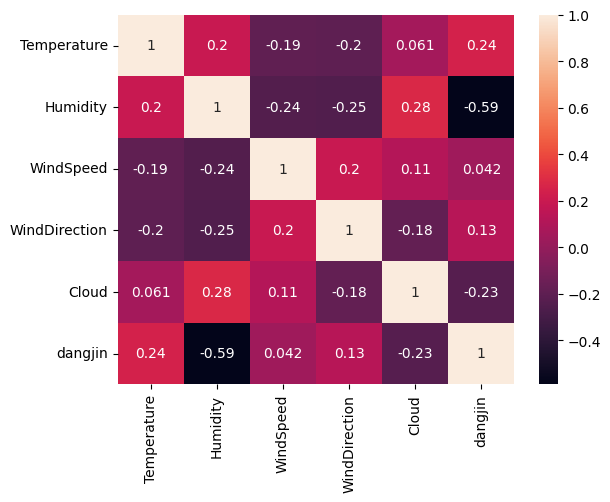

In [27]:
sns.heatmap(dangjin_fcst.corr(), annot=True)
plt.show()

**고민할 점**
---
* 상관계수가 낮으면 서로 관련이 적은 변수인가?
* WindDirection, WindSpeed을 단순하게 보간해도 되는가?
* Cloud는 원래 정수값만 가지고 있었는데, 정수가 아닌 실수가 보간 과정에 생겼다


**과제 1**
---
위에 제시된 문제점을 해결할 수 있는 방법을 찾아서 구현하기
* 첫 질문에 대해서는 시각화 자료(표, 그래프 등) 만들기
* 두 번째 질문에 대해서는 더 나은 방법 고민하고, 구현해 오기
* 세 번째 질문에 대해서는 더 좋은 방법 구현해 오기



In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

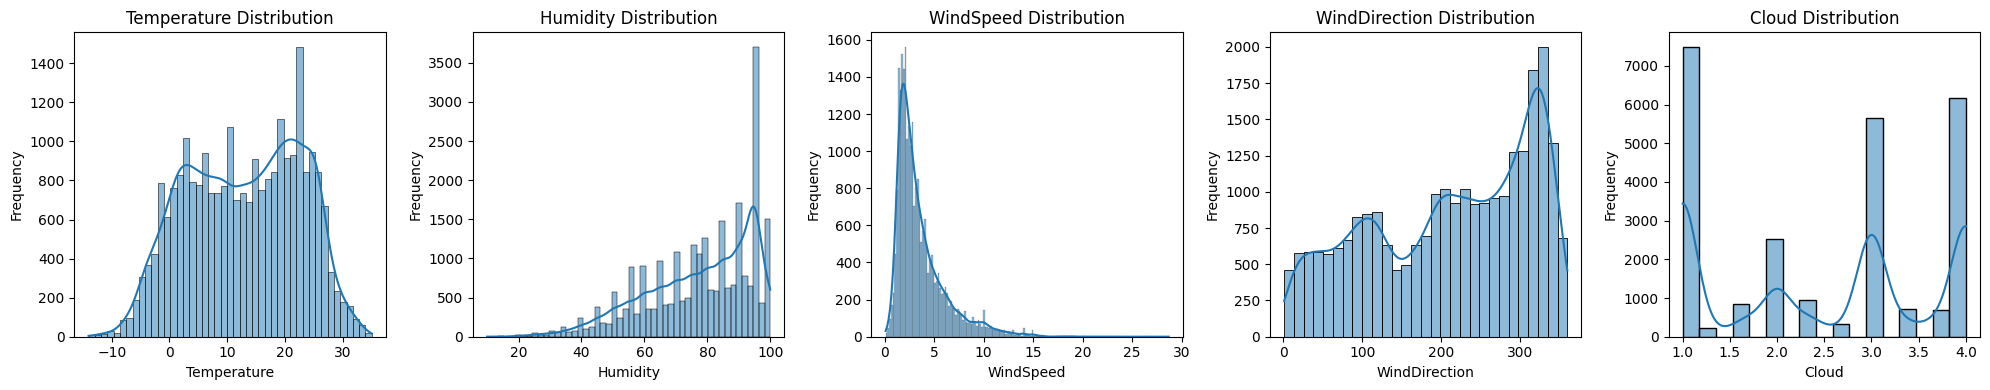

In [29]:
# 변수 쌍 조합 생성
variables = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']

# 결과 그래프를 그릴 subplot 생성
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# 각 변수에 대한 히스토그램 그리기
for i, variable in enumerate(variables):
    # 히스토그램 그리기
    sns.histplot(data=dangjin_fcst, x=variable, kde=True, ax=axes[i])
    axes[i].set_title(f'{variable} Distribution')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


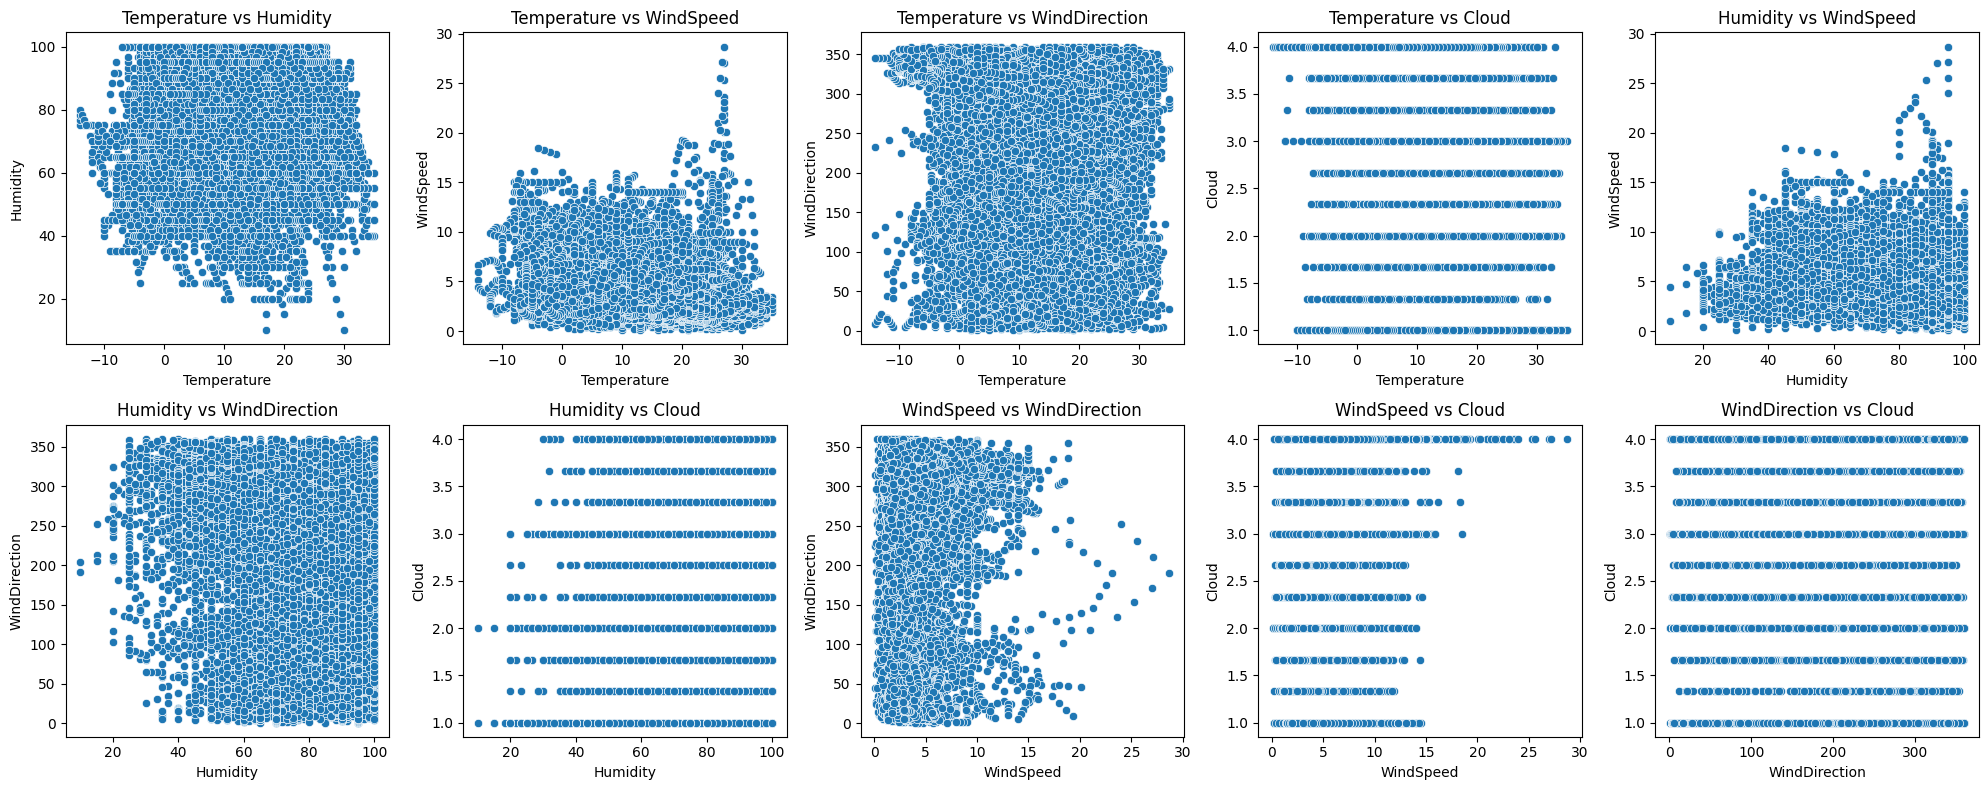

In [30]:
variables = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
pairs = [(variables[i], variables[j]) for i in range(len(variables)) for j in range(i+1, len(variables))]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for idx, pair in enumerate(pairs):
    row = idx // 5
    col = idx % 5
    x_var, y_var = pair
    
    # 산점도 그리기
    sns.scatterplot(data=dangjin_fcst, x=x_var, y=y_var, ax=axes[row, col])
    axes[row, col].set_title(f'{x_var} vs {y_var}')
    axes[row, col].set_xlabel(x_var)
    axes[row, col].set_ylabel(y_var)

plt.tight_layout()
plt.show()

### 더 나은 보간법이 있는가?

-> 스플라인 보간법을 이용해보자.
* 굳이 추가는 하지 않았음.


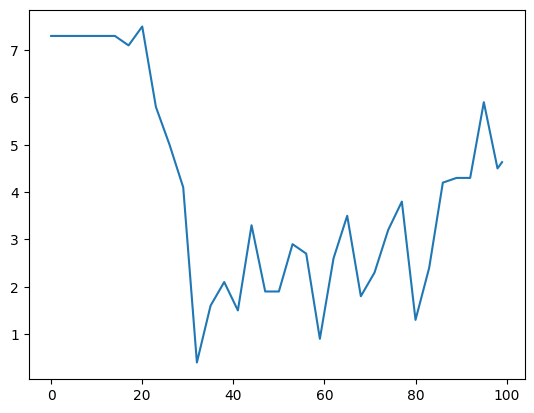

In [31]:
plt.plot(dangjin_fcst['WindSpeed'].interpolate('bfill')[:100])

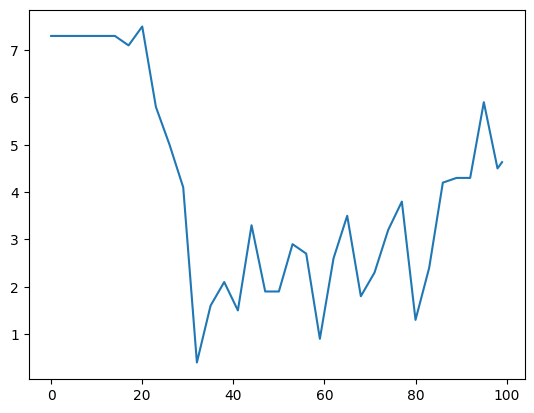

In [32]:
plt.plot(dangjin_fcst['WindSpeed'].interpolate('spline', order=2)[:100])

### Cloud에 대해

-> 실수들에 대해 정수화를 진행한다.

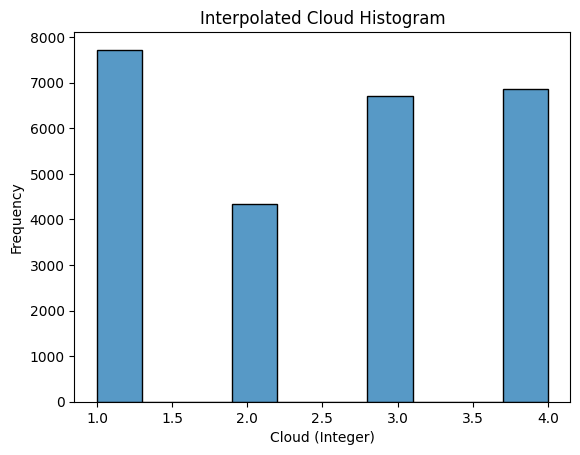

In [33]:
interpolated_cloud = dangjin_fcst['Cloud'].interpolate(method='linear')

interpolated_cloud_int = np.round(interpolated_cloud).astype(int)

sns.histplot(interpolated_cloud_int, bins=10)
plt.title('Interpolated Cloud Histogram')
plt.xlabel('Cloud (Integer)')
plt.ylabel('Frequency')
plt.show()

# ---과제1---

In [34]:
site_info_path='sample_data/site_info.csv'
site_info=pd.read_csv(site_info_path)

In [35]:
site_info

,Id,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,0.7,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,0.5,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


In [36]:
# !pip install pysolar

In [37]:
import pysolar
import datetime

In [38]:
latitude = 37.050753
longitude = 126.510299
KST = datetime.timezone(datetime.timedelta(hours=9))
def azimuth_from_time(time):
    temp_time = dt.datetime.fromisoformat(str(time))
    return pysolar.solar.get_azimuth(latitude, longitude,temp_time)
def altitude_from_time(time):
    temp_time = dt.datetime.fromisoformat(str(time))
    return pysolar.solar.get_altitude(latitude, longitude,temp_time)

In [39]:
dangjin_fcst['azimuth'] = dangjin_fcst['Forecast time'].apply(azimuth_from_time)
dangjin_fcst['altitude'] = dangjin_fcst['Forecast time'].apply(altitude_from_time)

In [40]:
dangjin_fcst

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,dangjin,azimuth,altitude
0,2018-03-01 01:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,6.874201,-60.601929
1,2018-03-01 02:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,34.321016,-56.310635
2,2018-03-01 03:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,54.416264,-47.879658
3,2018-03-01 04:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,68.730239,-37.330600
4,2018-03-01 05:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,79.788675,-25.803888
...,...,...,...,...,...,...,...,...,...
25627,2021-01-31 20:00:00+09:00,6.000000,78.333333,3.766667,172.000000,3.666667,0,266.384418,-24.600036
25628,2021-01-31 21:00:00+09:00,6.000000,80.000000,4.000000,174.000000,4.000000,0,275.587740,-36.549452
25629,2021-01-31 22:00:00+09:00,6.333333,80.000000,4.666667,174.666667,4.000000,0,286.798995,-48.276418
25630,2021-01-31 23:00:00+09:00,6.666667,80.000000,5.333333,175.333333,4.000000,0,302.735953,-59.152610


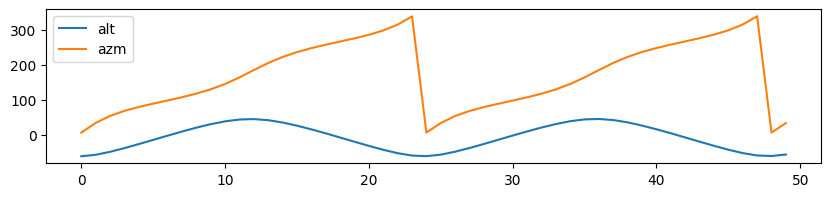

In [41]:
plt.figure(figsize=(10,2))
plt.plot(dangjin_fcst["altitude"][:50])
plt.plot(dangjin_fcst["azimuth"][:50])
plt.legend(["alt", "azm"])

**과제 2**
---
* 이미 가지고 있는 변수들로부터 새로운 변수 도출(분리, 합성) 해내기(약간의 외부 데이터 사용도 허용)
* 데이터 중 필요없는 부분 없애기(대회 사이트 활용)


* 새 변수 추가
    * 계절
    * ~~해 유무~~

In [42]:
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 데이터프레임에 월(month) 정보를 기반으로 계절(season) 열 추가
dangjin_fcst['Season'] = dangjin_fcst['Forecast time'].dt.month.apply(get_season)

dangjin_fcst

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,dangjin,azimuth,altitude,Season
0,2018-03-01 01:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,6.874201,-60.601929,봄
1,2018-03-01 02:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,34.321016,-56.310635,봄
2,2018-03-01 03:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,54.416264,-47.879658,봄
3,2018-03-01 04:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,68.730239,-37.330600,봄
4,2018-03-01 05:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,79.788675,-25.803888,봄
...,...,...,...,...,...,...,...,...,...,...
25627,2021-01-31 20:00:00+09:00,6.000000,78.333333,3.766667,172.000000,3.666667,0,266.384418,-24.600036,겨울
25628,2021-01-31 21:00:00+09:00,6.000000,80.000000,4.000000,174.000000,4.000000,0,275.587740,-36.549452,겨울
25629,2021-01-31 22:00:00+09:00,6.333333,80.000000,4.666667,174.666667,4.000000,0,286.798995,-48.276418,겨울
25630,2021-01-31 23:00:00+09:00,6.666667,80.000000,5.333333,175.333333,4.000000,0,302.735953,-59.152610,겨울


In [43]:
# !pip install ephem

In [44]:
# from datetime import datetime
# import pytz
# import ephem

# # 위치 정보
# latitude = '37.055'  # 위도
# longitude = '126.508'  # 경도

# # ephem 라이브러리를 사용하여 일출 및 일몰 시간 계산
# def calculate_sunrise_sunset(date):
#     obs = ephem.Observer()
#     obs.lat = latitude
#     obs.long = longitude
#     obs.elevation = 0  # 해수면에서의 고도 (지정하지 않으면 기본값으로 설정됨)
#     obs.date = date
#     sunrise = obs.previous_rising(ephem.Sun())  # 일출 시간 계산
#     sunset = obs.next_setting(ephem.Sun())  # 일몰 시간 계산
#     return sunrise.datetime(), sunset.datetime()


In [45]:
# # 일출 및 일몰 시간 계산하여 추가
# dangjin_fcst[['Sunrise', 'Sunset']] = dangjin_fcst.apply(calculate_sunrise_sunset, axis=1, result_type='expand')

# # 해가 떠있는지 여부 열 추가
# def is_sunrise_sunset(row):
#     forecast_time = row['Forecast time']
#     sunrise = row['Sunrise']
#     sunset = row['Sunset']
#     if sunrise <= forecast_time <= sunset:
#         return 1  # 해가 떠있음
#     else:
#         return 0  # 해가 떠있지 않음

# # 해가 떠있는지 여부 열 추가
# dangjin_fcst['is_Sun'] = dangjin_fcst.apply(is_sunrise_sunset, axis=1)


In [46]:
dangjin_fcst

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,dangjin,azimuth,altitude,Season
0,2018-03-01 01:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,6.874201,-60.601929,봄
1,2018-03-01 02:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,34.321016,-56.310635,봄
2,2018-03-01 03:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,54.416264,-47.879658,봄
3,2018-03-01 04:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,68.730239,-37.330600,봄
4,2018-03-01 05:00:00+09:00,0.000000,60.000000,7.300000,309.000000,2.000000,0,79.788675,-25.803888,봄
...,...,...,...,...,...,...,...,...,...,...
25627,2021-01-31 20:00:00+09:00,6.000000,78.333333,3.766667,172.000000,3.666667,0,266.384418,-24.600036,겨울
25628,2021-01-31 21:00:00+09:00,6.000000,80.000000,4.000000,174.000000,4.000000,0,275.587740,-36.549452,겨울
25629,2021-01-31 22:00:00+09:00,6.333333,80.000000,4.666667,174.666667,4.000000,0,286.798995,-48.276418,겨울
25630,2021-01-31 23:00:00+09:00,6.666667,80.000000,5.333333,175.333333,4.000000,0,302.735953,-59.152610,겨울


### 데이터 솎아내기